# Module 4 Unit 3
## Applying a neural network to a business problem
### Classification problem

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will not be graded, but you should submit it when you submit your assignment, so that the Tutor Team can see how you arrived at your answers.

In [62]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Import data
df = pd.read_csv('Mamo_data.csv', delimiter = ",")

In [64]:
# Explore the size of the data set
df.shape

(830, 11)

In [65]:
# Explore type of data and feature names
df.head()

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
0,0,0,45,1,0,0,0,0,1,0,3
1,1,0,69,0,0,1,0,0,0,1,3
2,0,0,58,0,0,1,0,0,1,0,3
3,1,0,72,0,0,1,0,1,0,0,3
4,1,0,71,0,0,1,0,0,1,0,3


Choose `malignanttrue` as the `y` variable, and the rest of the variables except the unnamed column as `X` variables.
**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [66]:
# Split data into features (X) and response (y)
X = df.iloc[:, 1:11] 
y = df.iloc[:,0] 

In [67]:
# Explore type of data and feature names
# You can use df.head() or df.tail() to see the first or last few records, respectively.
# However, if data is sorted, it is better to view some randomly sampled records
df.sample(10, random_state=0)

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
647,1,5,66,0,0,1,0,0,1,0,3
31,0,3,49,0,0,1,0,0,1,0,3
474,0,4,48,0,0,1,0,0,0,1,3
8,0,2,23,0,0,0,0,0,0,0,3
382,1,4,46,0,1,0,0,0,0,0,3
255,1,4,50,1,0,0,0,0,0,0,3
672,1,5,74,0,0,1,0,1,0,0,3
679,1,5,74,0,0,1,0,0,1,0,3
196,0,4,70,0,0,0,0,0,0,0,1
652,1,5,54,0,0,1,0,0,1,0,3


In [68]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array
# YOUR CODE HERE
y = np.ravel(y)

In [69]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scale the data in the next cell.  
Use the variable names `X_train` and `X_test`.

In [70]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
# YOUR CODE HERE
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# Apply the same transformation to test data
# YOUR CODE HERE
X_test = scaler.transform(X_test)

Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [71]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.8461538461538461

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [72]:
# Fit and check accuracy for various numbers of nodes on both layers
# Note that this will take some time
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.82476
(3, 4) : 0.83762
(3, 5) : 0.82637
(4, 3) : 0.81511
(4, 4) : 0.82476
(4, 5) : 0.81350
(5, 3) : 0.81672
(5, 4) : 0.81994
(5, 5) : 0.82637


In [73]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.8376
This corresponds to nodes (3, 4)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [74]:
# Fit data with best parameter
# YOUR CODE HERE
clf = MLPClassifier(max_iter=1000, 
                    hidden_layer_sizes=( optimal_hidden_layer_size),random_state=1)
clf.fit(X_train, y_train)
# Does not converge fully without changing max_iter (accuracy on 0.83), so changing maximum iteration to 2000 still does not coverge fully as the accuracy still the same

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [75]:
# Predict
y_pred = clf.predict(X_test)
# Accuracy 
accuracy_score(y_pred,y_test)

0.8269230769230769

For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable. 

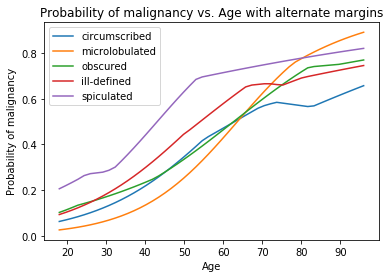

In [76]:
# Visualise probability of malignancy vs age with alternate margins
# Copy dataframe so as not to change the original, and obtain means
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    # Change margins
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = clf.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

Continue to the activity submission to answer questions about this notebook.